# Code Tutorial: 

# Historical Simulation for Risk Measures


# Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
#pd.options.display.float_format = '{:,.2f}'.format

# Load and Pre-process Historical Data

In [2]:
# Historical data of the four indices adjusted to USD
df = pd.read_csv('world_indices_full.csv')
print('Historical Data (Raw)')
df.head()

Historical Data (Raw)


,Day,Date,DJIA,FTSE-100,USD/GBP,CAC-40,EUR/USD,Nikkei,YEN/USD
0,0,7-Aug-06,11219.38,5828.8,1.9098,4956.34,0.7776,15154.06,115.00
1,1,8-Aug-06,11173.59,5818.1,1.9072,4967.95,0.7789,15464.66,115.08
2,2,9-Aug-06,11076.18,5860.5,1.9086,5025.15,0.7762,15656.59,115.17
3,3,10-Aug-06,11124.37,5823.4,1.8918,4976.64,0.7828,15630.91,115.41
4,4,11-Aug-06,11088.02,5820.1,1.8970,4985.52,0.7833,15565.02,116.07


In [3]:
df['FTSE-100 Adj.'] = df['FTSE-100']  * df['USD/GBP']
df['CAC-40 Adj.'] = df['CAC-40']  / df['EUR/USD']
df['Nikkei Adj.'] = df['Nikkei']  / df['YEN/USD']

df[['Date','DJIA','FTSE-100 Adj.','CAC-40 Adj.','Nikkei Adj.']].to_csv('data_historical_simulation_adjusted.csv', index = None)
df = pd.read_csv('data_historical_simulation_adjusted.csv')
print('Historical Data (Adjusted for currency exchange rates)')
df

Historical Data (Adjusted for currency exchange rates)


,Date,DJIA,FTSE-100 Adj.,CAC-40 Adj.,Nikkei Adj.
0,7-Aug-06,11219.38,11131.84224,6373.894033,131.774435
1,8-Aug-06,11173.59,11096.28032,6378.161510,134.381821
2,9-Aug-06,11076.18,11185.35030,6474.040196,135.943301
3,10-Aug-06,11124.37,11016.70812,6357.485948,135.438090
4,11-Aug-06,11088.02,11040.72970,6364.764458,134.100284
...,...,...,...,...,...
496,18-Sep-08,11019.69,8878.18400,5689.850489,109.547101
497,19-Sep-08,11388.44,9734.01951,6230.005762,111.618539
498,22-Sep-08,11015.69,9656.26083,6181.952576,113.228975
499,24-Sep-08,10825.17,9438.57988,6033.934595,114.260398


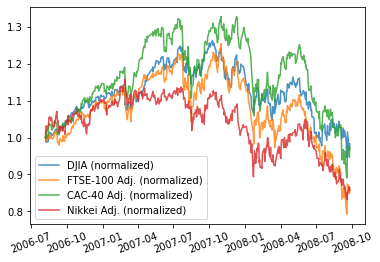

In [4]:
dates = pd.to_datetime(df.Date)
plt.plot(dates, df['DJIA']/11219.38, label = 'DJIA (normalized)', alpha = 0.8)
plt.plot(dates, df['FTSE-100 Adj.']/11131.84224, label = 'FTSE-100 Adj. (normalized)', alpha = 0.8)
plt.plot(dates, df['CAC-40 Adj.']/6373.894033, label = 'CAC-40 Adj. (normalized)', alpha = 0.8)
plt.plot(dates, df['Nikkei Adj.']/131.774435, label = 'Nikkei Adj. (normalized)', alpha = 0.8)
plt.legend()
plt.xticks(rotation=20)
plt.savefig('4-index data.pdf')
plt.show()

In [5]:
# Current position in USD
positions = np.array([4000, 3000, 1000, 2000]).reshape((1,-1))
positions

array([[4000, 3000, 1000, 2000]])

# Generate Historical Simulation Data

In [6]:
# Indices for columns with price information
irange = [1,2,3,4]
irange

[1, 2, 3, 4]

In [7]:
#price in the last day
last_prices = df.iloc[-1, irange].values.reshape((1,-1)).astype(float)
last_prices

array([[11022.06      ,  9599.8984    ,  6200.39606865,   112.8221199 ]])

In [8]:
# construct the simulated scenarios
df_simulation = last_prices * (df.iloc[1:, irange]) / (df.shift(periods=1).iloc[1:, irange])
df_simulation['Portfolio Value'] = np.sum(df_simulation.values / last_prices * positions , axis = 1)
df_simulation['Loss'] = np.sum(positions) - df_simulation['Portfolio Value'] 
df_simulation.reset_index(inplace = True)
df_simulation.rename(columns={"index": "Scenario"}, inplace = True)

df_simulation.to_csv('data_historical_simulation_scenarios.csv', index = None)

print('Simulated Data')
df_simulation

Simulated Data


,Scenario,DJIA,FTSE-100 Adj.,CAC-40 Adj.,Nikkei Adj.,Portfolio Value,Loss
0,1,10977.075328,9569.230447,6204.547384,115.054502,10014.333846,-14.333846
1,2,10925.971020,9676.956904,6293.602524,114.133082,10027.481313,-27.481313
2,3,11070.014536,9455.160171,6088.768325,112.402835,9946.735941,53.264059
3,4,10986.044308,9620.830672,6207.494731,111.707706,9974.860634,25.139366
4,5,11031.851405,9659.697615,6265.571993,114.564247,10063.635125,-63.635125
...,...,...,...,...,...,...,...
495,496,11448.027963,9662.992581,6214.282488,110.184137,10129.780585,-129.780585
496,497,11390.889307,10525.305436,6789.019028,114.955485,10555.795411,-555.795411
497,498,10661.301822,9523.211125,6152.571268,114.449921,9866.255624,133.744376
498,499,10831.429829,9383.488027,6051.936484,113.849836,9857.464506,142.535494


In [9]:
# Total number of scenarios
n = len(df_simulation)
print('Total number of scenarios: ', n)

Total number of scenarios:  500


Loss distribution


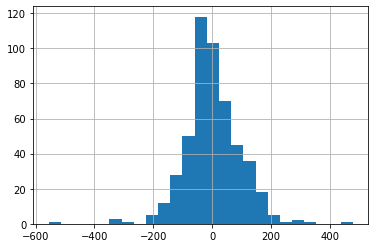

In [10]:
# histogram of portfolio losses
df_simulation.Loss.hist(bins = 25)
plt.savefig('losses.pdf')
print('Loss distribution')
plt.show()

# Method 1. VaR and ES: Basic Version

In [11]:
# Defining the confidence level alpha 
alpha = 0.99

In [12]:
# Ranked Loss
df_loss = df_simulation[['Scenario','Loss']].sort_values(by = 'Loss', ascending = False)
print('Loss distribution: from the worst to the best')
df_loss

Loss distribution: from the worst to the best


,Scenario,Loss
493,494,477.841001
338,339,345.435075
348,349,282.203845
328,329,277.041294
486,487,253.384956
...,...,...
488,489,-284.924692
340,341,-307.930115
376,377,-316.489339
378,379,-333.021840


In [13]:
# Method 1: VaR and ES calculation using Percentile Function
losses = df_simulation.Loss.values

VaR  = np.percentile(losses, alpha * 100, interpolation = 'higher') 
ES = np.mean(losses [losses >= VaR])

print('VaR: ', VaR)
print('ES ', ES)

VaR:  253.3849560997951
ES  327.1812343292771


In [14]:
# Method 2: VaR and ES calculation from ranked Loss
losses_sorted = df_loss.Loss.values

Critial_index = 4
VaR  = losses_sorted[Critial_index]
ES = np.mean( losses_sorted[0: Critial_index + 1] )

print('VaR: ', VaR)
print('ES ', ES)

VaR:  253.3849560997951
ES  327.1812343292771


# Method 2. VaR and ES:  Exponential Weighting Scheme

In [15]:
Lambda = 0.995
df_loss['Weight'] = np.power( Lambda, n - df_loss.Scenario) * (1- Lambda) / (1- np.power(Lambda, n))
df_loss['Cum Weight'] = np.cumsum(df_loss.Weight)
df_loss

,Scenario,Loss,Weight,Cum Weight
493,494,477.841001,0.005283,0.005283
338,339,345.435075,0.002429,0.007712
348,349,282.203845,0.002554,0.010266
328,329,277.041294,0.002310,0.012576
486,487,253.384956,0.005101,0.017677
...,...,...,...,...
488,489,-284.924692,0.005152,0.986276
340,341,-307.930115,0.002454,0.988730
376,377,-316.489339,0.002939,0.991669
378,379,-333.021840,0.002968,0.994637


In [16]:
# VaR and ES calculation

weights = df_loss['Weight'].values
cum_weights = df_loss['Cum Weight'].values
losses_sorted = df_loss.Loss.values

Critial_index = np.where(cum_weights >= 1 - alpha, np.arange(n) , np.inf).argmin()
VaR  = df_loss.Loss.iloc[Critial_index]

w_for_ES = weights[0:Critial_index].tolist() + [1 - alpha - cum_weights[Critial_index-1]]
ES = np.sum( losses_sorted[0: Critial_index + 1] * w_for_ES )/ (1-alpha)

print('Weight for ES: ', w_for_ES)

print('VaR: ', VaR)
print('ES ', ES)



Weight for ES:  [0.0052827895216603655, 0.00242907443549901, 0.0022881360428406335]
VaR:  282.20384520461266
ES  400.9141733391478


# Method 3. VaR and ES: Normal Distribution Approximation

In [17]:
from scipy.stats import norm

sigma = losses_sorted.std() 
VaR = 0 + sigma * norm.ppf(alpha)
ES = 0 + sigma * norm.pdf(norm.ppf(alpha))/(1-alpha)

print('VaR: ',  VaR)
print('ES ', ES)

VaR:  217.75700822477393
ES  249.47647829321903


# Method 4. VaR and ES: Extreme Value Theory

In [18]:
# Initialization


u = 160 #In general the rule of thumb for u is the 95 percentile of historical loss data
tail_losses = losses_sorted[losses_sorted > u]
n_u = len(tail_losses )

# Definition the og likelihood function 
def EVT_likelihood (paras):
    beta = paras[0]
    xi = paras[1]
    return  (-1/xi -1) * np.sum( np.log(1 + xi * (tail_losses - u)/beta ) ) - n_u * np.log(beta) 


x0 = (40, 0.3) #Initial guess of beta and xi
print('Initial guess of the (beta, xi) configuration: ', x0)
print('Log likelihood for the initial guess: ', EVT_likelihood ((40, 0.3)))


Initial guess of the (beta, xi) configuration:  (40, 0.3)
Log likelihood for the initial guess:  -108.3677826497676


In [19]:
# Maximum Likelihood Estimate: the (beta, xi) configuration that "best explains the data", or that maximizes the log likelihood function

# Setting up an unconstrained optimization problem. If beta or xi are negative, then it is likely to be a sign that 
# (a) the tail of the distribution is not heavier than the normal distribution; or 
# (b) an inappropriate value of u has been chosen



# The negative sign in "- EVT_likelihood (x)" is because we are maximizing while the solver solves minimization by default
#res = opt.minimize( lambda x: - EVT_likelihood (x)  , x0, method='SLSQP',  options={ 'ftol': 1e-11, 'disp': True})
res = opt.minimize( lambda x: - EVT_likelihood (x)  , x0, method='trust-constr',  options={'disp': True})


beta_optimal, xi_optimal =  res.x

print('Optimal (beta, xi) configuration: ', beta_optimal, xi_optimal )
print('Log likelihood for the optimal solution : ', EVT_likelihood ((beta_optimal, xi_optimal)))

VaR = u + beta_optimal/xi_optimal * (np.power(n/n_u * (1-alpha),-xi_optimal) - 1)
ES  = (VaR + beta_optimal - xi_optimal * u)/(1 - xi_optimal)

print('VaR: ',  VaR)
print('ES ', ES)

`xtol` termination condition is satisfied.
Number of iterations: 37, function evaluations: 90, CG iterations: 46, optimality: 9.54e-07, constraint violation: 0.00e+00, execution time: 0.11 s.
Optimal (beta, xi) configuration:  32.53163452925411 0.43624581429985804
Log likelihood for the optimal solution :  -108.20609317143487
VaR:  227.75220491851996
ES  337.8857558693401


/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
